![Imgur](https://i.imgur.com/4HJknC2.png)

#### Tip: You are suggested to use GPU/TPU for this assignment

# Kindle Book Rating Prediction for Discovering Hidden Gems
## Business Problem

Unlike the clothing company scenario in the group assignment, rating prediction for kindle eBooks is more vital to Amazon's business decisions.  
  
For example, by quatifying people's discussion on books that have yet to be published electronically and books that Amazon don't have rights to sell currently, Amazon could discover "hidden gems" and establish contracts with the authors to secure exclusive electronic publication rights (that is: electronic version of the book can be sold only on Amazon eBook platform). In this case, Kindle would have a competitive advantage over its competitors dsince Kindle would have better content.

![Imgur](https://i.imgur.com/iOjMFIn.png?1)

Credit by Good Reader

### Task 
For this assignment, you are required to create a rating prediction model based on kindle ebook customer reviews posted on Amazon eBook platform.

### File Preparation:

Read the data into a dataframe. **Reviews with no rating and ratings with no review text should be excluded from the dataframe.**

**TIPS:**  
The columns you would use are the overall rating column and review text column

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deep learning/lab5/kindle_reviews_dataset.csv",index_col=0)
df=df.dropna(subset=["overall","reviewText"]).reset_index(drop=True)

For this assignment, let's only look at books with more than 250 reviews

In [4]:
df=df[df["asin"].isin(df["asin"].value_counts()[df["asin"].value_counts()>250].index)].loc[:,["overall","reviewText"]]

This leaves us with 18040 lines of review

In [5]:
len(df)

18040

As mentioned in group assignemnt, we could find out that the target value distribution is highly uneven. Therefore, we should use stratified sampling.  

In [6]:
df["overall"].value_counts()

5    11116
4     4176
3     1671
2      605
1      472
Name: overall, dtype: int64

Build a train dataset for model training and validation dataset for model assessment.  
90% of the data should be used to build the training subset, while 10% of the data should be used to build the validation subset.  
You should use review text as the predictor and overall rating as the outcome.  

#**Question 1:**Please try to change your test size 0.1, 0.2, 0.3 for getting lower mape errors for training and validation results, and explain what you have after changing these parameters. (just leave one optimal result)

Think about this: what could be the possible problem if the test size is extremely large or small?)

In [7]:
from sklearn.model_selection import train_test_split
rev=df["reviewText"]
target=df["overall"]
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.1,random_state=0,stratify=target)

**Answer:**  
###<font color = blue>We can find that based on our code, test_size = 0.1 has the lowest mape error.

# **Question 2:** For preparing your word embeding vectors, please try to change maxlen as 100, 150, and 200 for getting better mape errors for training and validation results, and explain what you have after changing these parameters.(just leave one optimal result)

Think about this: How would you decide the value of maxlen in real life cases?

In [9]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 200
batch_size = 128

tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen) 
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)




16236 train sequences
1804 test sequences
Pad sequences (samples x text length)
X_train shape: (16236, 200)
X_test shape: (1804, 200)


# **Question 3:** Please use SimpleRNN, LSTM, droupout, recurrent_dropout, and change other parameters for getting better mape results, and explain what you have after changing these parameters. (Please try at least 5 different combinations of parameters to answer this question, as fine tuning is a significant task in real life senarios)
### Tips: we want 1 embedding layer and 2 lstm layer; Use dropout and recurrent_dropout in the first lstm layer. Change other hyperparameters to have a better result.

Recall: what does each of this mean: SimpleRNN, LSTM, dropout, recurrent_dropout ? Feel free to refer to the course materials any time you get confused with one of the concepts. 

In [14]:
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, LSTM, SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout


model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.LSTM(64,dropout=0.2,recurrent_dropout=0.2, return_sequences=True))
model.add(layers.LSTM(64))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_test,y_test))
keras.backend.clear_session()
del model

Epoch 1/20
127/127 [==============================] - 163s 1s/step - loss: 0.9634 - mape: 33.4781 - val_loss: 0.6232 - val_mape: 27.3514
Epoch 2/20
127/127 [==============================] - 163s 1s/step - loss: 0.6262 - mape: 27.4544 - val_loss: 0.6228 - val_mape: 27.3157
Epoch 3/20
127/127 [==============================] - 157s 1s/step - loss: 0.6229 - mape: 27.3348 - val_loss: 0.6208 - val_mape: 27.1952
Epoch 4/20
127/127 [==============================] - 170s 1s/step - loss: 0.6070 - mape: 26.2729 - val_loss: 0.5374 - val_mape: 22.0314
Epoch 5/20
127/127 [==============================] - 151s 1s/step - loss: 0.4828 - mape: 19.0330 - val_loss: 0.4946 - val_mape: 19.6410
Epoch 6/20
127/127 [==============================] - 148s 1s/step - loss: 0.4135 - mape: 16.1622 - val_loss: 0.4649 - val_mape: 18.1006
Epoch 7/20
127/127 [==============================] - 145s 1s/step - loss: 0.3775 - mape: 14.6170 - val_loss: 0.4700 - val_mape: 17.5280
Epoch 8/20
127/127 [=====================

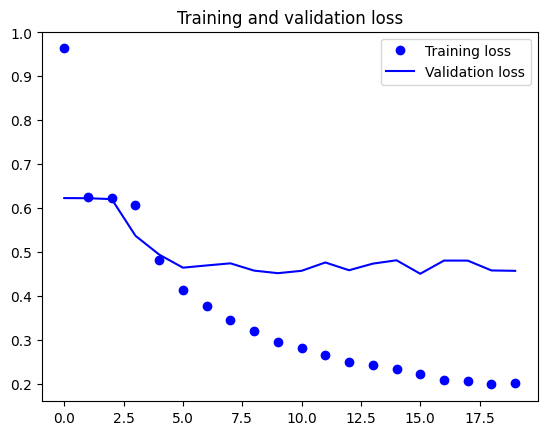

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Question 4:** Predict the rating using a model that has both Conv1D layer and LSTM layer. 
### Tips: You can use your model in Question 3 and add covolution layer between embedding and lstm.
Recall what does each parameter in Conv1D and LSTM represent. Think about what case does each combination of parameters better fits when you are answering this question.

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D
from keras.layers import Dense



model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.LSTM(64,dropout=0.2,recurrent_dropout=0.2,  return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train, epochs=15, batch_size=batch_size, validation_data=(X_test,y_test))
keras.backend.clear_session()
del model



Epoch 1/15
127/127 [==============================] - 177s 1s/step - loss: 0.9634 - mape: 33.4378 - val_loss: 0.6229 - val_mape: 27.3975
Epoch 2/15
127/127 [==============================] - 178s 1s/step - loss: 0.6246 - mape: 27.3454 - val_loss: 0.6205 - val_mape: 27.1696
Epoch 3/15
127/127 [==============================] - 173s 1s/step - loss: 0.5648 - mape: 23.7210 - val_loss: 0.5166 - val_mape: 20.1874
Epoch 4/15
127/127 [==============================] - 174s 1s/step - loss: 0.4522 - mape: 17.9666 - val_loss: 0.4972 - val_mape: 19.5795
Epoch 5/15
127/127 [==============================] - 177s 1s/step - loss: 0.4099 - mape: 16.1387 - val_loss: 0.4768 - val_mape: 17.6134
Epoch 6/15
127/127 [==============================] - 173s 1s/step - loss: 0.3782 - mape: 14.7058 - val_loss: 0.4775 - val_mape: 17.5747
Epoch 7/15
127/127 [==============================] - 174s 1s/step - loss: 0.3416 - mape: 12.9559 - val_loss: 0.4720 - val_mape: 18.4988
Epoch 8/15
127/127 [=====================

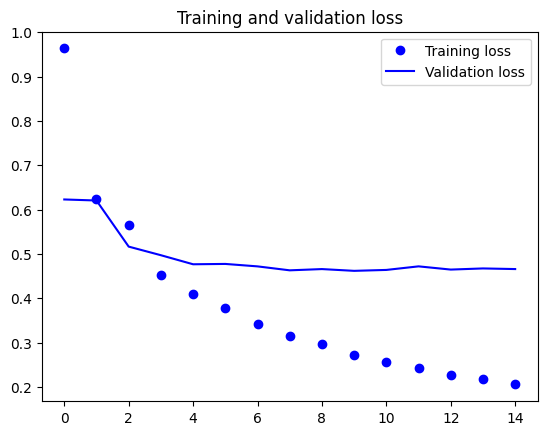

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**QUESTION:** Comment on the result and efficiency of this model by comparing it with the ones in question 2. (i.e. What's the problem of this model? What's good for the model? ) 

**Answer:**  
###<font color = blue> In case of maxlen, we find that when maxlen = 200 we can get the lowest mape error. <br> In case of model, we can find that it is not significantly different to have a Conv1D layer in the model, since the validation errors are similar.

# **Question 5:** Predict the rating using a model that has dropout, recurrent dropout, embedding and bidirectional lstm.
### Tips: you can use 2 bidirectional lstm layers.

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(64,dropout=0.5,recurrent_dropout=0.2, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1))


model.compile(optimizer='adam', loss='mae', metrics='mape')
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_test,y_test))
keras.backend.clear_session()
del model


Epoch 1/20
127/127 [==============================] - 316s 2s/step - loss: 0.9376 - mape: 32.7329 - val_loss: 0.6255 - val_mape: 27.3446
Epoch 2/20
127/127 [==============================] - 293s 2s/step - loss: 0.5896 - mape: 24.7314 - val_loss: 0.5280 - val_mape: 20.3306
Epoch 3/20
127/127 [==============================] - 301s 2s/step - loss: 0.4520 - mape: 17.5683 - val_loss: 0.4917 - val_mape: 19.8511
Epoch 4/20
127/127 [==============================] - 299s 2s/step - loss: 0.4028 - mape: 15.6994 - val_loss: 0.4687 - val_mape: 17.5954
Epoch 5/20
127/127 [==============================] - 297s 2s/step - loss: 0.3733 - mape: 14.2546 - val_loss: 0.4730 - val_mape: 17.9886
Epoch 6/20
127/127 [==============================] - 297s 2s/step - loss: 0.3451 - mape: 12.9650 - val_loss: 0.4677 - val_mape: 16.7442
Epoch 7/20
127/127 [==============================] - 298s 2s/step - loss: 0.3286 - mape: 12.3234 - val_loss: 0.4893 - val_mape: 17.5742
Epoch 8/20
127/127 [=====================

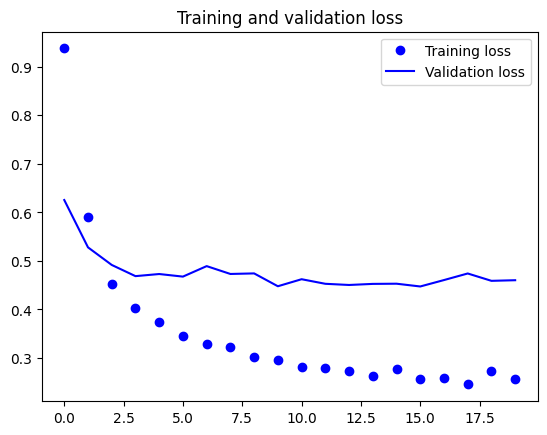

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Please add comment on the result and efficiency of this model.(Can you think of possible ways to improve the model? What's your final choice of the model for the problem in this assignment?)<br>

###<font color = blue> We can find that the model with bidirectional lstm, which processes the input sequence in two directions, forward and backward, using two separate hidden state vectors, does not significantly increase the model.

Please let me know if you have any questions at salihtutun@wustl.edu. 

Salih Tutun, Ph.D.